In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Data_train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#We have just 2 missing values which is very small so lets drop that rows
df=df.dropna()

In [7]:
df_train=df.copy()

In [8]:
#Check for duplicate values
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
#Drop duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [11]:
#Converting No Info to No info because both are same 
df['Additional_Info']=df['Additional_Info'].replace({'No Info':'No info'})

In [12]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')
            print(f'{column}\n:{df[column].value_counts()}')


In [13]:
unique_col_values(df)

Airline:['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Airline
:Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Date_of_Journey:['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019'

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
#Extract month and day features from DAte of journey
df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [16]:
#Drop date of journey as we have already converted it to integers
df=df.drop(['Date_of_Journey'],axis=1)

In [17]:
#Extract hour and minute features from Dep_Time 
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
#Extract hour and minute from Arrival_Time
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
#Drop dep_time and arrival time as we have already converted it to integers
df=df.drop(['Arrival_Time','Dep_Time'],axis=1)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
'2h 50m'.split(sep='h')

['2', ' 50m']

In [22]:
'2h 50m'.split(sep='m')[0].split()

['2h', '50']

In [23]:
#Lets convert duration into duration hours and duration mins

#Asssign and convert duration into list
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'  #Adds 0 min
        else:
            duration[i]='0h '+duration[i]   #adds 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))  #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  #Extract only mins from duration

In [24]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [25]:
#Dropping duration column as we have already separated data from it
df=df.drop(['Duration'],axis=1)

In [26]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Data Visualisation

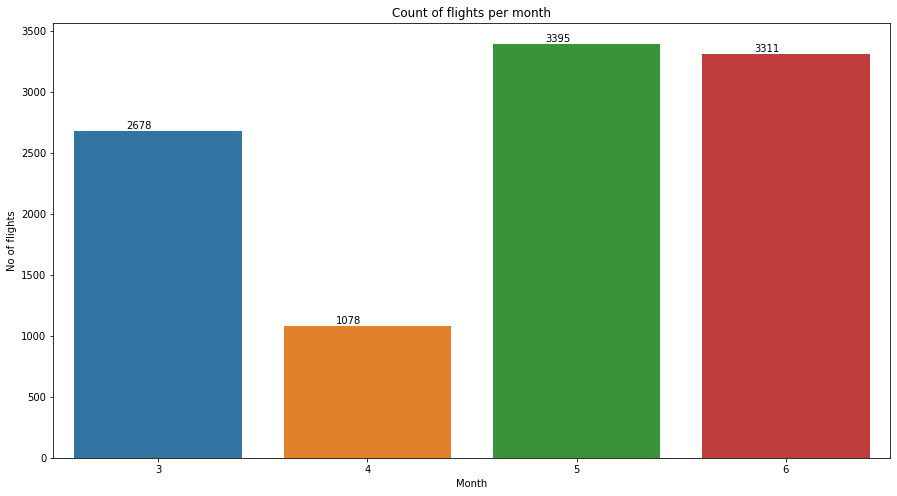

In [27]:
plt.figure(figsize=(15,8))
plt.title('Count of flights per month')
ax=sns.countplot(x='Journey_month',data=df)
plt.xlabel('Month')
plt.ylabel('No of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [28]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

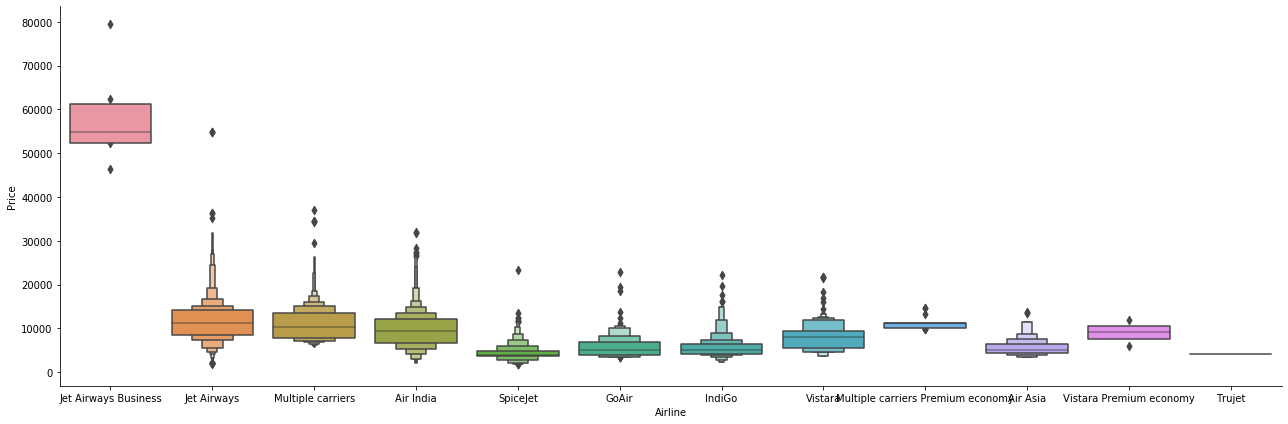

In [29]:
#Airline Vs price

sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

From graph we can see that Jet Airways Business have the highest Price.

Apart from the first Airline almost all are having similar median


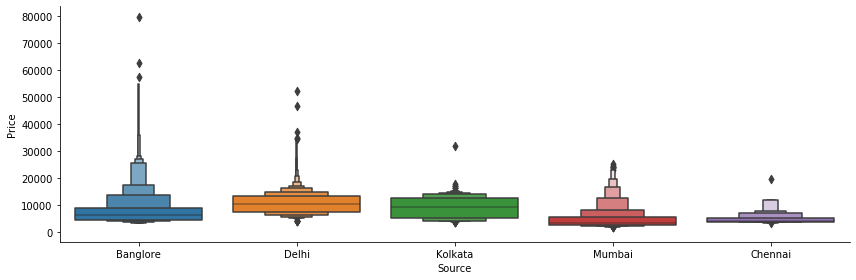

In [30]:
#Source Vs Price

sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=3)

### Categorical Encoding

**Nominal Data** - data are not in any order - Onehot Encoding is used in this case <br>
**Ordinal Data** - data is in order - Label Encoding will be used in this case 

In [31]:
# As Airline is nominal category. Lets do onehot encoding
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
# As Source is nominal category. Lets do onehot encoding
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
# As Destination is nominal category. Lets do onehot encoding
Destination = df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
#As total stops is ordinal variable Lets perform label encoding
df=df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [38]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [39]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10462 non-null  int64
 1   Price                                      10462 non-null  int64
 2   Journey_day                                10462 non-null  int64
 3   Journey_month                              10462 non-null  int64
 4   Dep_hour                                   10462 non-null  int64
 5   Dep_min                                    10462 non-null  int64
 6   Arrival_hour                               10462 non-null  int64
 7   Arrival_min                                10462 non-null  int64
 8   Duration_hours                             10462 non-null  int64
 9   Duration_mins                              10462 non-null  int64
 10  Airline_Air India                          104

### Feature selection 
LEts see which features have best contribution and have good relation with target variable

In [42]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [44]:
X=df.drop('Price',axis=1)

In [45]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
y=df['Price']

Extra Trees Regressor

In [56]:
#Lets look at the important features in our data
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(X,y)

ExtraTreesRegressor()

In [57]:
et.feature_importances_

array([2.40803206e-01, 1.43630188e-01, 5.38420612e-02, 2.51450658e-02,
       2.14962082e-02, 2.79999967e-02, 1.93264863e-02, 1.23049395e-01,
       1.77337158e-02, 9.23952205e-03, 1.92753633e-03, 1.43477995e-02,
       1.31810249e-01, 6.80905046e-02, 1.99118479e-02, 8.80020696e-04,
       2.96863260e-03, 1.11053033e-04, 5.34360908e-03, 7.51102519e-05,
       4.23047444e-04, 7.62625387e-03, 3.23408141e-03, 7.30030537e-03,
       7.76656580e-03, 1.44329415e-02, 5.89095629e-03, 3.76709220e-04,
       2.52169320e-02])

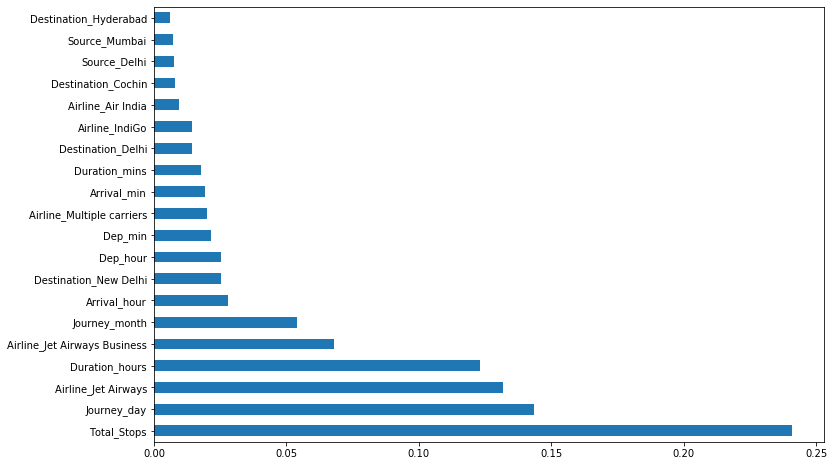

In [58]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances=pd.Series(et.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
dt_pred=dt.predict(X_test)

In [64]:
dt.score(X_test,y_test)

0.7122486456372943

In [65]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [66]:
depth=list(range(3,30))
param_grid=dict(max_depth=depth)
tree=GridSearchCV(dt,param_grid,cv=5)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [67]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=13)

In [68]:
tree_pred=tree.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [76]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("mean absolute error: ",mae(y_test,tree_pred))
print("Root mean squared error: ", np.sqrt(mse(y_test,tree_pred)))
print("R-squared: ", r2_score(y_test, tree_pred))


Test Results for Decision Tree Regressor Model:
--------------------------------------------------
mean absolute error:  1251.861229597792
Root mean squared error:  2127.5295311725426
R-squared:  0.7829102202785561


In [74]:
from sklearn.metrics import mean_absolute_error as mae

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split=[2,5,10,15]
min_samples_leaf=[1,2,5,10]

In [78]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [79]:
reg_rf=RandomForestRegressor()

In [80]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   7.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   7.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   7.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   8.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   8.1s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   7.3s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   7.7s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   8.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   7.6s
[CV] END max_depth=15, mi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [83]:
rf_pred=rf_random.predict(X_test)

In [84]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("mean absolute error: ",mae(y_test,rf_pred))
print("Root mean squared error: ", np.sqrt(mse(y_test,rf_pred)))
print("R-squared: ", r2_score(y_test, rf_pred))


Test Results for Random Forest Regressor Model:
--------------------------------------------------
mean absolute error:  1152.563127148583
Root mean squared error:  1874.183339981168
R-squared:  0.8315339745047826


C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


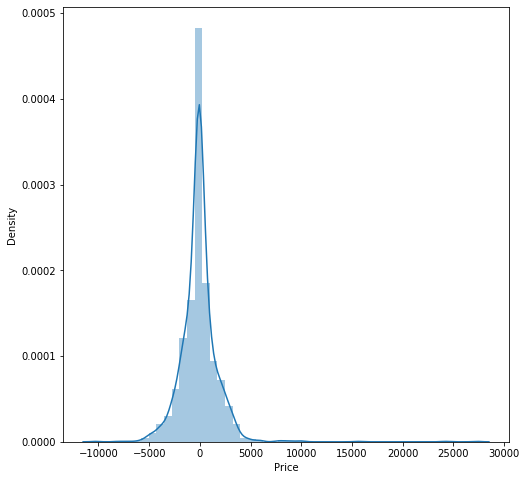

In [85]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-rf_pred)
plt.show()

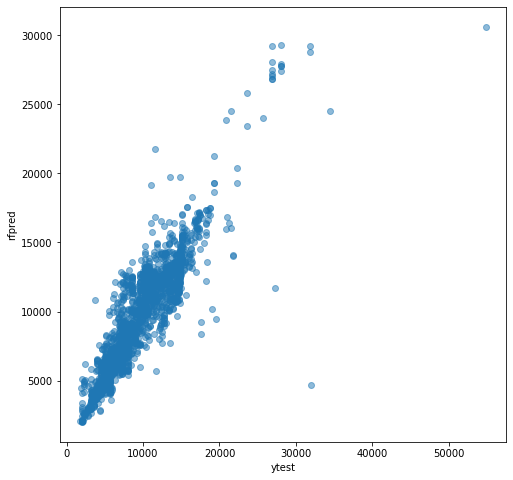

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,rf_pred,alpha=0.5)
plt.xlabel('ytest')
plt.ylabel('rfpred')
plt.show()

In [87]:
#XGBREgressor
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}


In [88]:
from xgboost import XGBRegressor

In [89]:
model=RandomizedSearchCV(XGBRegressor(),tuned_params,n_iter=20,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)

In [90]:
model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [92]:
model.best_params_

{'reg_lambda': 1.0, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1}

In [93]:
xgb_preds=model.predict(X_test)

In [94]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("mean absolute error: ",mae(y_test,xgb_preds))
print("Root mean squared error: ", np.sqrt(mse(y_test,xgb_preds)))
print("R-squared: ", r2_score(y_test, xgb_preds))


Test Results for XGBoost Regressor Model:
--------------------------------------------------
mean absolute error:  1230.893148991803
Root mean squared error:  1898.4011128194206
R-squared:  0.8271520856686301


Comparitively Random Forest have highest R2 score. Lets take that as our final model

In [95]:
import pickle

In [96]:
file=open('flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [97]:
model=open('flight_rf.pkl','rb')

In [98]:
forest = pickle.load(model)

In [99]:
y_prediction = forest.predict(X_test)

In [100]:
r2_score(y_test, y_prediction)

0.8315339745047826